In [26]:
%load_ext autoreload
%autoreload 2
import importlib

import sparc
importlib.reload(sparc)
from sparc import load_model


import soundfile as sf
import IPython.display as ipd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use('ggplot')
import sys
import scipy as sp
import sklearn as skl
from sklearn.decomposition import PCA


import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
color_code = {"UL":mpl.colors.to_rgb("#EE3A5B"),
              "LL":mpl.colors.to_rgb("#FFD155"),
              "LI":mpl.colors.to_rgb("#959595"),
              "TT":mpl.colors.to_rgb("#43B962"),
              "TB":mpl.colors.to_rgb("#C44B9F"),
              "TD":mpl.colors.to_rgb("#0093B7"),
              "Loudness":mpl.colors.to_rgb("#FB754D"),
              "Pitch":mpl.colors.to_rgb("#FB754D"),}

HPRC_channel_label = ['LIX','LIY','ULX','ULY','LLX','LLY','TTX','TTY','TBX','TBY','TDX','TDY']

def plot_art(ax, art, gap=5, skip_y=False,color=None,alpha=1.0, lw=2):
    yticks=[]
    ytick_labels=[]
    labels = ["UL","LL", "LI", "TT", "TB", "TD"]
    chidxs = []
    HPRC_channel_label = ['LIX','LIY','ULX','ULY','LLX','LLY','TTX','TTY','TBX','TBY','TDX','TDY']
    channel_label = HPRC_channel_label
    for l in labels:
        chidxs.append(HPRC_channel_label.index(l+"X"))
        chidxs.append(HPRC_channel_label.index(l+"Y"))
        
    time = np.arange(0, art.shape[0]) / 50 
    print(len(art))
    print(time)  
    for i, ch_i in enumerate(chidxs):
        ch_label = channel_label[ch_i]
        ytick_labels.append(ch_label)
        if ch_i < 12:
            art_name= ch_label[:2]
            if color is None:
                color = color_code[art_name]
        else:
            art_name = ch_label
            if color is None:
                color = color_code[art_name]
        x = art[:,ch_i]
        ax.plot(time, x-gap*i,color='k',alpha=alpha,lw=lw)
        ax.plot(time, 2*np.concatenate(([0], np.diff(x))) - gap*i,color='r',alpha=alpha*0.5,lw=1)

        yticks.append(-gap*i)

    i = i+1
    # diffs = np.diff(art, axis=0)
    # maxdiffs = np.max(diffs, axis = 1)
    diffs = np.vstack([np.zeros((1, 12)), np.abs(np.diff(art, axis=0))])
    maxdiffs = np.max(diffs, axis = 1)
    ax.plot(time, 2*maxdiffs-gap*i,color='r',alpha=alpha*0.5,lw=lw)
    yticks.append(-gap*i)
    ytick_labels.append('~max velocity')

    if skip_y:
        ytick_labels = [""]*len(ytick_labels)

    ax.set_yticks(yticks,ytick_labels,fontsize=15)

    # xticks= np.arange(0,len(art),50)
    # xtick_labels= [f"{int(x*20/1000)}" for x in xticks]
    # ax.set_xticks(xticks, xtick_labels,fontsize=15)
    ax.set_xlabel("Time (s)", fontsize=15)
    # ax.set_xlim(0,len(art))
    return yticks

In [3]:
yticks=[]
ytick_labels=[]
labels = ["UL","LL", "LI", "TT", "TB", "TD"]
chidxs = []
HPRC_channel_label = ['LIX','LIY','ULX','ULY','LLX','LLY','TTX','TTY','TBX','TBY','TDX','TDY']

In [4]:
coder = load_model("en", device= "cpu", use_penn=True)

load_model v3
load_model v3


/Users/ly546/Library/CloudStorage/GoogleDrive-1prlabu1@gmail.com/My Drive/shbt/BML-guenther/2024S-guenther-audio-primitives/util/Speech-Articulatory-Coding/sparc/sparc.py:51: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any

Using PENN for pitch tracking.


/Users/ly546/Library/CloudStorage/GoogleDrive-1prlabu1@gmail.com/My Drive/shbt/BML-guenther/2024S-guenther-audio-primitives/util/Speech-Articulatory-Coding/.conda/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


# Visualize wav

In [51]:
# wav_file  = '../sample_audio/pataka-fast.wav'
wav_file  = '../sample_audio/be2d.wav'
wav_file2  = '../sample_audio/be2d-fran-trim-2.wav'
wav_file3  = '../sample_audio/be2d-chin-trim.wav'

# wav_file  = '/Volumes/Nexus4/DBS/derivatives/sub-DM1033/aec/sub-DM1033_ses-intraop_task-lombard_run-03_recording-directionalmicaec_physio.wav'
# wav_file = '../sample_audio/sub-DM1033_ses-intraop_task-lombard_run-03_directionalmicaec-start-99s.wav'

codes = [coder.encode(f) for f in [wav_file, wav_file2, wav_file3]]
# code = coder.encode(wav_file)
# code2 = coder.encode(wav_file2)

# sound = out['wav']
# ema = out['ema'].squeeze()


        # x = art[:,ch_i]
        # ax.plot(time, np.concatenate(0, np.diff(x))-gap*i,color='r',alpha=alpha*0.5,lw=1)
        # ax.plot(time, x-gap*i,color=color,alpha=alpha,lw=lw)
# i = i+1
# diffs = np.vstack([np.zeros((1, 12)), np.diff(ema, axis=0)])
# maxdiffs = np.max(ema, axis = 1)
# ax.plot(time[2:-1], maxdiffs-gap*i,color=color,alpha=alpha,lw=lw)
# maxdiffs.shape
# maxdiffs.shape

wav, wav_fs = sf.read(wav_file)
# # wav.size


# {k:v.shape for k, v in codes[1].items()}
# {k:v.shape for k, v in code.items()}
        

/Users/ly546/Library/CloudStorage/GoogleDrive-1prlabu1@gmail.com/My Drive/shbt/BML-guenther/2024S-guenther-audio-primitives/util/Speech-Articulatory-Coding/.conda/lib/python3.9/site-packages/torch/nn/functional.py:5849: UserWarning: Support for mismatched key_padding_mask and attn_mask is deprecated. Use same type for both instead.
  warnings.warn(


_extract_ema: v4
_extract_ema: v4
_extract_ema: v4


In [52]:
codes[2]['acoustics_wvlm'].shape

(114, 1024)

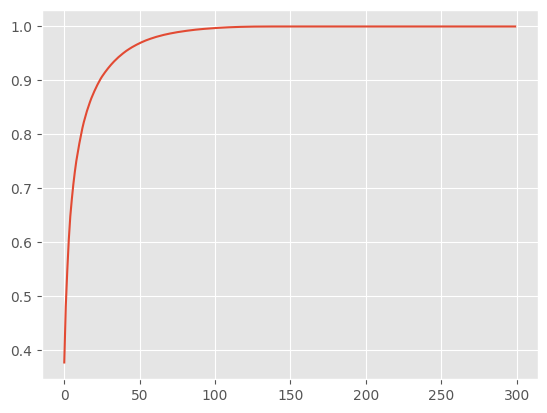

In [53]:
allacoustics = np.concatenate([c['acoustics_wvlm'] for c in codes], axis=0)
pca = PCA().fit(allacoustics)
plt.plot(np.cumsum(pca.explained_variance_ratio_))


In [54]:
codes[1]['acoustics_wvlm'].shape

(98, 1024)

In [67]:
acoustics_wvlm_tranformed = [pca.transform(c['acoustics_wvlm'])[:, 0:12] for c in codes]
for i, c in enumerate(codes): 
    c.update({'acoustics_wvlm_transform': acoustics_wvlm_tranformed[i]})
#     c['acoustics_wvlm'] = 
# acoustics_wvlm_tranformed[1].shape
# codes[1].keys()

Text(0.5, 0, 'Time [sample]')

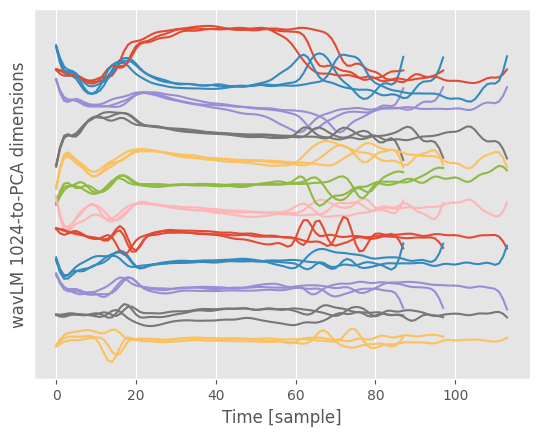

In [84]:
offset = -100
# c = codes[2]
for c in codes: 
    d = c['acoustics_wvlm_transform']
    plt.gca().set_prop_cycle(None)
    for i in range(d.shape[1]): 
        plt.plot(d[:, i] + i*offset)

plt.gca().set_yticks([])
plt.gca().set_ylabel('wavLM 1024-to-PCA dimensions')
plt.gca().set_xlabel('Time [sample]')

In [ ]:
fig,ax = plt.subplots(3,1, figsize=(5,10), sharex=True)

ax[0].plot(np.arange(0, wav.size) / wav_fs, wav)

for code in codes: 
    plot_art(ax[1], (code['ema']), color='C0', gap=6, alpha=0.5, lw=1)
# plot_art(ax[1], perturb_ema(code['ema']), color='C0', gap=6, alpha=0.5, lw=2)
# plot_art(ax[1], (code2['ema']), color='C0', gap=6, alpha=0.5, lw=1)


plt.show()

# Encode, resynthesize, perturb wav file

In [ ]:
# wav_file = '/Users/ly546/Downloads/sub-DM1033_ses-intraop_task-lombard_run-03_clip.wav'
code_orig = coder.encode(wav_file)

In [ ]:
wav = coder.decode(**code_orig)
sf.write(wav_file[0:-4] + '-resynth.wav', wav, coder.sr)

# resynthesized
ipd.display(ipd.Audio(wav, rate=coder.sr))

In [ ]:
def perturb_ema(ema): 
    pert = np.zeros_like(ema) 
    pert_t = np.arange(0, pert.shape[0]) / 50 

    t_pert_start = 0.3
    t_pert_end = 1.2

    idxs_x = [s in ['TBX', 'TDX'] for i,s in enumerate(HPRC_channel_label)]
    idxs_y = [s in ['TBY', 'TDY'] for i,s in enumerate(HPRC_channel_label)]

    idxs_t = (pert_t>t_pert_start) & (pert_t<t_pert_end)

    # pert[idxs_t, idxs_x] = 0.1
    pert[np.ix_(idxs_t, idxs_x)] = 0.5
    pert[np.ix_(idxs_t, idxs_y)] = 1

    # pert = [ for i in range(pert.shape[1])] 
    pert = np.apply_along_axis(lambda x : sp.signal.savgol_filter(x, 5, 2), axis=0, arr=pert)

    # plt.imshow(pert)
    # np.max(ema, axis=0)
    return ema + pert

In [ ]:
# code = copy.deepcopy(code_orig)
code = code_orig.copy()

code['ema'] = perturb_ema(code_orig['ema'])
wav = coder.decode(**code)
sf.write(wav_file[0:-4] + '-resynth-pert.wav', wav, coder.sr)

# resynthesized
ipd.display(ipd.Audio(wav, rate=coder.sr))

In [ ]:
# extend the perturbation 
idx_split = 44
def extendmat(m, idx, nrpt, axis=0):
    return np.concatenate((m[0:idx, :], np.tile(m[idx, :], (nrpt, 1)), m[idx:-1, :]), axis=axis)

code =  {k: (extendmat(v, idx_split, 50) if k in ['ema', 'loudness', 'pitch', 'periodicity'] else v) for k, v in code.items()}
# {k: extendmat(v, idx_split, 20) for k, v in code.items()}

wav = coder.decode(**code)
sf.write(wav_file[0:-4] + '-resynth-pert-extended.wav', wav, coder.sr)

ipd.display(ipd.Audio(wav, rate=coder.sr))

In [ ]:
# ground truth reference
wavt,tsr = sf.read(wav_file)
ipd.display(ipd.Audio(wavt, rate=tsr))

# Voice Conversion

In [ ]:
# src_wav_file = '/Users/ly546/Downloads/sub-DM1033_ses-intraop_task-lombard_run-03_clip.wav' # '/Users/ly546/Downloads/sub-DM1033_ses-intraop_task-lombard_run-03_clip.wav'
# src_wav_file = '../sample_audio/sub-DM1033_ses-intraop_task-lombard_run-03_directionalmicaec-start-99s.wav'
src_wav_file = '../sample_audio/pataka-fast.wav'

# targspkemb_wav_file = '../sample_audio/be2d-chin-trim.wav'
targspkemb_wav_file = '../sample_audio/buy-bobby-a-puppy-Alice.wav'


In [ ]:
converted_wav = coder.convert(src_wav_file, targspkemb_wav_file)
ipd.display(ipd.Audio(converted_wav, rate=coder.sr))

In [ ]:
src_code = coder.encode(src_wav_file)

In [ ]:
converted_code = coder.encode(converted_wav)

In [ ]:
# Articulatory traces remain consistent after voice conversion.
plt.plot(src_code['ema'][:,5])
plt.plot(converted_code['ema'][:,5])

In [ ]:
# source audio
src_wav,sr = sf.read(src_wav_file)
ipd.display(ipd.Audio(src_wav, rate=sr))

In [ ]:
# target audio
trg_wav,sr = sf.read(targspkemb_wav_file)
ipd.display(ipd.Audio(trg_wav, rate=sr))

# Unseen Language

In [ ]:
wav_file = "../sample_audio/italian.wav"

In [ ]:
code = coder.encode(wav_file)

In [ ]:
wav = coder.decode(**code)

In [ ]:
# resynthesized
ipd.display(ipd.Audio(wav, rate=coder.sr))

In [ ]:
# ground truth reference
wavt,tsr = sf.read(wav_file)
ipd.display(ipd.Audio(wavt, rate=tsr))